# STAT 220: Final Lab, Mashable

*You are hired as data scientists by Mashable, an online news platform that generates buzz through shares of its posts. Your task is to build a model to predict the number of shares a news article will receive based on its characteristics.*

*The data comes from Mashable.com, hosted on the UC Irvine Machine Learning repository: https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity. You can download the dataset from there or at https://richardson.byu.edu/220/OnlineNewsPopularity.csv. There are 61 variables in total. A description of the variables is available at https://richardson.byu.edu/220/ONPvariables.txt. The target variable is the number of shares a news article receives, located as the last variable in the dataset.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [105]:
# Load dataset
df = pd.read_csv('https://richardson.byu.edu/220/OnlineNewsPopularity.csv')
df.columns = df.columns.str.strip()
df = df.drop(columns=['url', 'timedelta'])
clean_df = df.copy()
clean_df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


## Exploratory Data Analysis (EDA)

1. *Plot the target variable. Determine if the target variable seems appropriate or if any transformations are needed.*
2. *Build a linear regression model without higher-order terms and identify the most significant predictors.*
3. *Build a regression tree to identify important predictors.*
4. *Select several significant features from steps 2 and 3. Create visualizations or tables to explore the relationships between these features and the target variable.*
5. *Write an EDA section in your technical report. Report the results of the initial models and include figures or tables that show the target variable and its relationship with potentially significant predictors.*
6. *Use appropriate methods to remove insignificant variables from the model.*

### 1. Target Variable Transformation

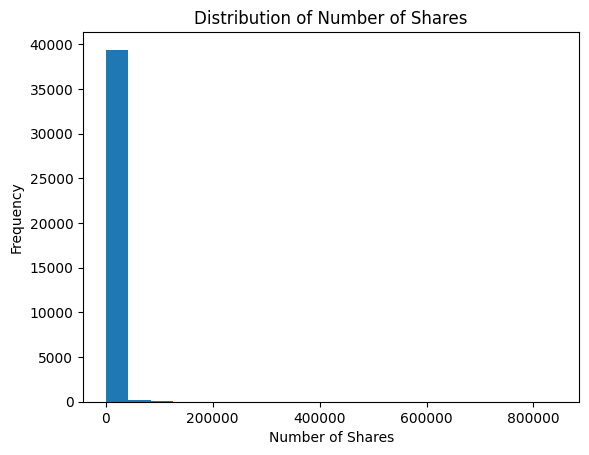

In [106]:
# Plot distribution of shares
plt.hist(df['shares'], bins=20)
plt.xlabel('Number of Shares')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Shares')
plt.show()

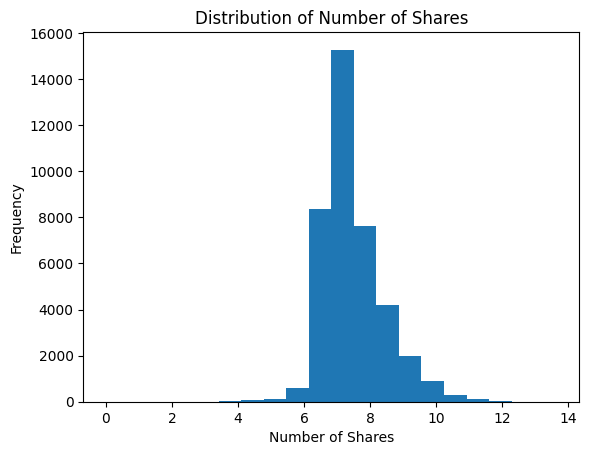

In [107]:
# Transform and plot log-shares
df['shares'] = np.log(clean_df['shares'])
plt.hist(df['shares'], bins=20)
plt.xlabel('Number of Shares')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Shares')
plt.show()

**Response:**

The target variable `shares` is severely right-skewed and should be transformed with a log.

### 2. Basic Linear Regression

In [108]:
# Train basic linear regression model
model = sm.OLS(df['shares'], sm.add_constant(df.drop(columns=['shares']))).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     102.7
Date:                Thu, 12 Dec 2024   Prob (F-statistic):               0.00
Time:                        02:46:36   Log-Likelihood:                -50707.
No. Observations:               39644   AIC:                         1.015e+05
Df Residuals:                   39587   BIC:                         1.020e+05
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [109]:
# Find significant factors
p_values = model.pvalues
lin_reg_features = list(p_values[p_values < 0.05].index)

print("Factors with p-value < 0.05:")
lin_reg_features

Factors with p-value < 0.05:


['n_tokens_title',
 'n_tokens_content',
 'n_non_stop_unique_tokens',
 'num_hrefs',
 'num_self_hrefs',
 'num_imgs',
 'average_token_length',
 'num_keywords',
 'data_channel_is_lifestyle',
 'data_channel_is_entertainment',
 'data_channel_is_bus',
 'data_channel_is_socmed',
 'data_channel_is_tech',
 'kw_min_min',
 'kw_max_min',
 'kw_avg_min',
 'kw_min_max',
 'kw_avg_max',
 'kw_min_avg',
 'kw_max_avg',
 'kw_avg_avg',
 'global_subjectivity',
 'global_rate_positive_words',
 'min_positive_polarity',
 'title_subjectivity',
 'title_sentiment_polarity',
 'abs_title_subjectivity']

**Response:**

There seem to be a lot of significant factors here. Some insigificant ones include day of the week, LDA closeness, and rate of non-stop-words.

### 3. Basic Regression Tree

In [12]:
# Fit Regression Tree
tree = DecisionTreeRegressor(random_state=42)
tree = tree.fit(df.drop(columns=['shares']), df['shares'])

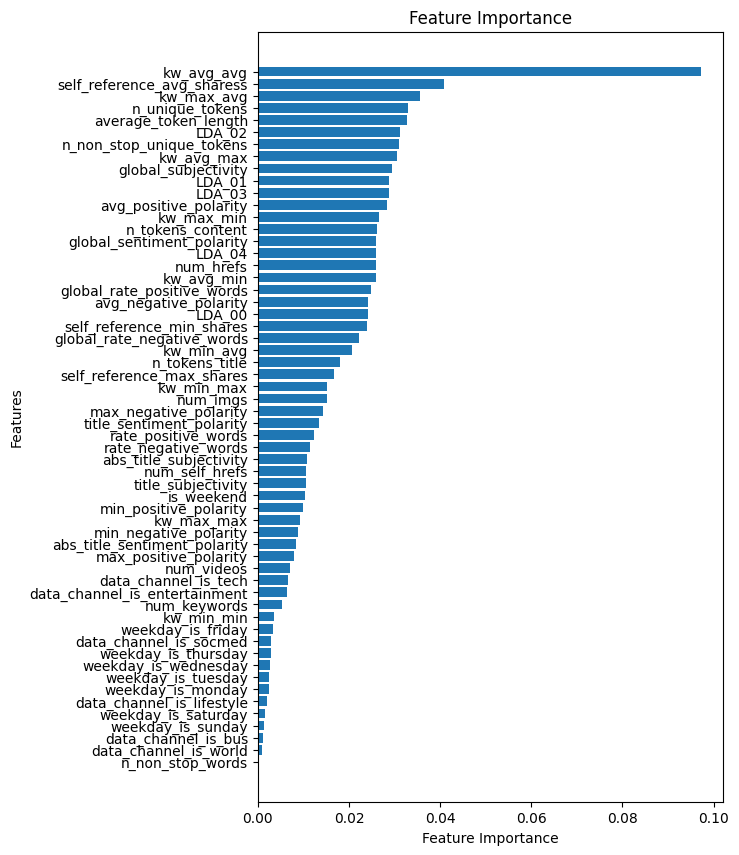

In [13]:
# Extract important features
importances = pd.DataFrame(data={
    'Attribute': df.drop(columns=['shares']).columns,
    'Importance': tree.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=True)

# Plot feature importances
plt.figure(figsize=(6, 10))
plt.barh(importances['Attribute'], importances['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

In [14]:
# Find top 20 features
tree_features = list(importances.nlargest(20, 'Importance')['Attribute'])
tree_features

['kw_avg_avg',
 'self_reference_avg_sharess',
 'kw_max_avg',
 'n_unique_tokens',
 'average_token_length',
 'LDA_02',
 'n_non_stop_unique_tokens',
 'kw_avg_max',
 'global_subjectivity',
 'LDA_01',
 'LDA_03',
 'avg_positive_polarity',
 'kw_max_min',
 'n_tokens_content',
 'global_sentiment_polarity',
 'LDA_04',
 'num_hrefs',
 'kw_avg_min',
 'global_rate_positive_words',
 'avg_negative_polarity']

### 4. Significant Feature Visualization

In [15]:
# Calculate correlation between feature and 'shares'
sig_features = list(set(lin_reg_features + tree_features))

correlation_dict = {}
for feature in sig_features:
    correlation_dict[feature] = df[feature].corr(df['shares'])

correlation_df = pd.DataFrame.from_dict(correlation_dict, orient='index', columns=['Correlation'])
correlation_df.sort_values(by='Correlation', ascending=False)

,Correlation
kw_avg_avg,0.221720
LDA_03,0.125962
kw_max_avg,0.109292
kw_min_avg,0.108823
num_hrefs,0.105105
num_imgs,0.091518
self_reference_avg_sharess,0.087217
data_channel_is_socmed,0.081106
global_subjectivity,0.075145
num_keywords,0.065948


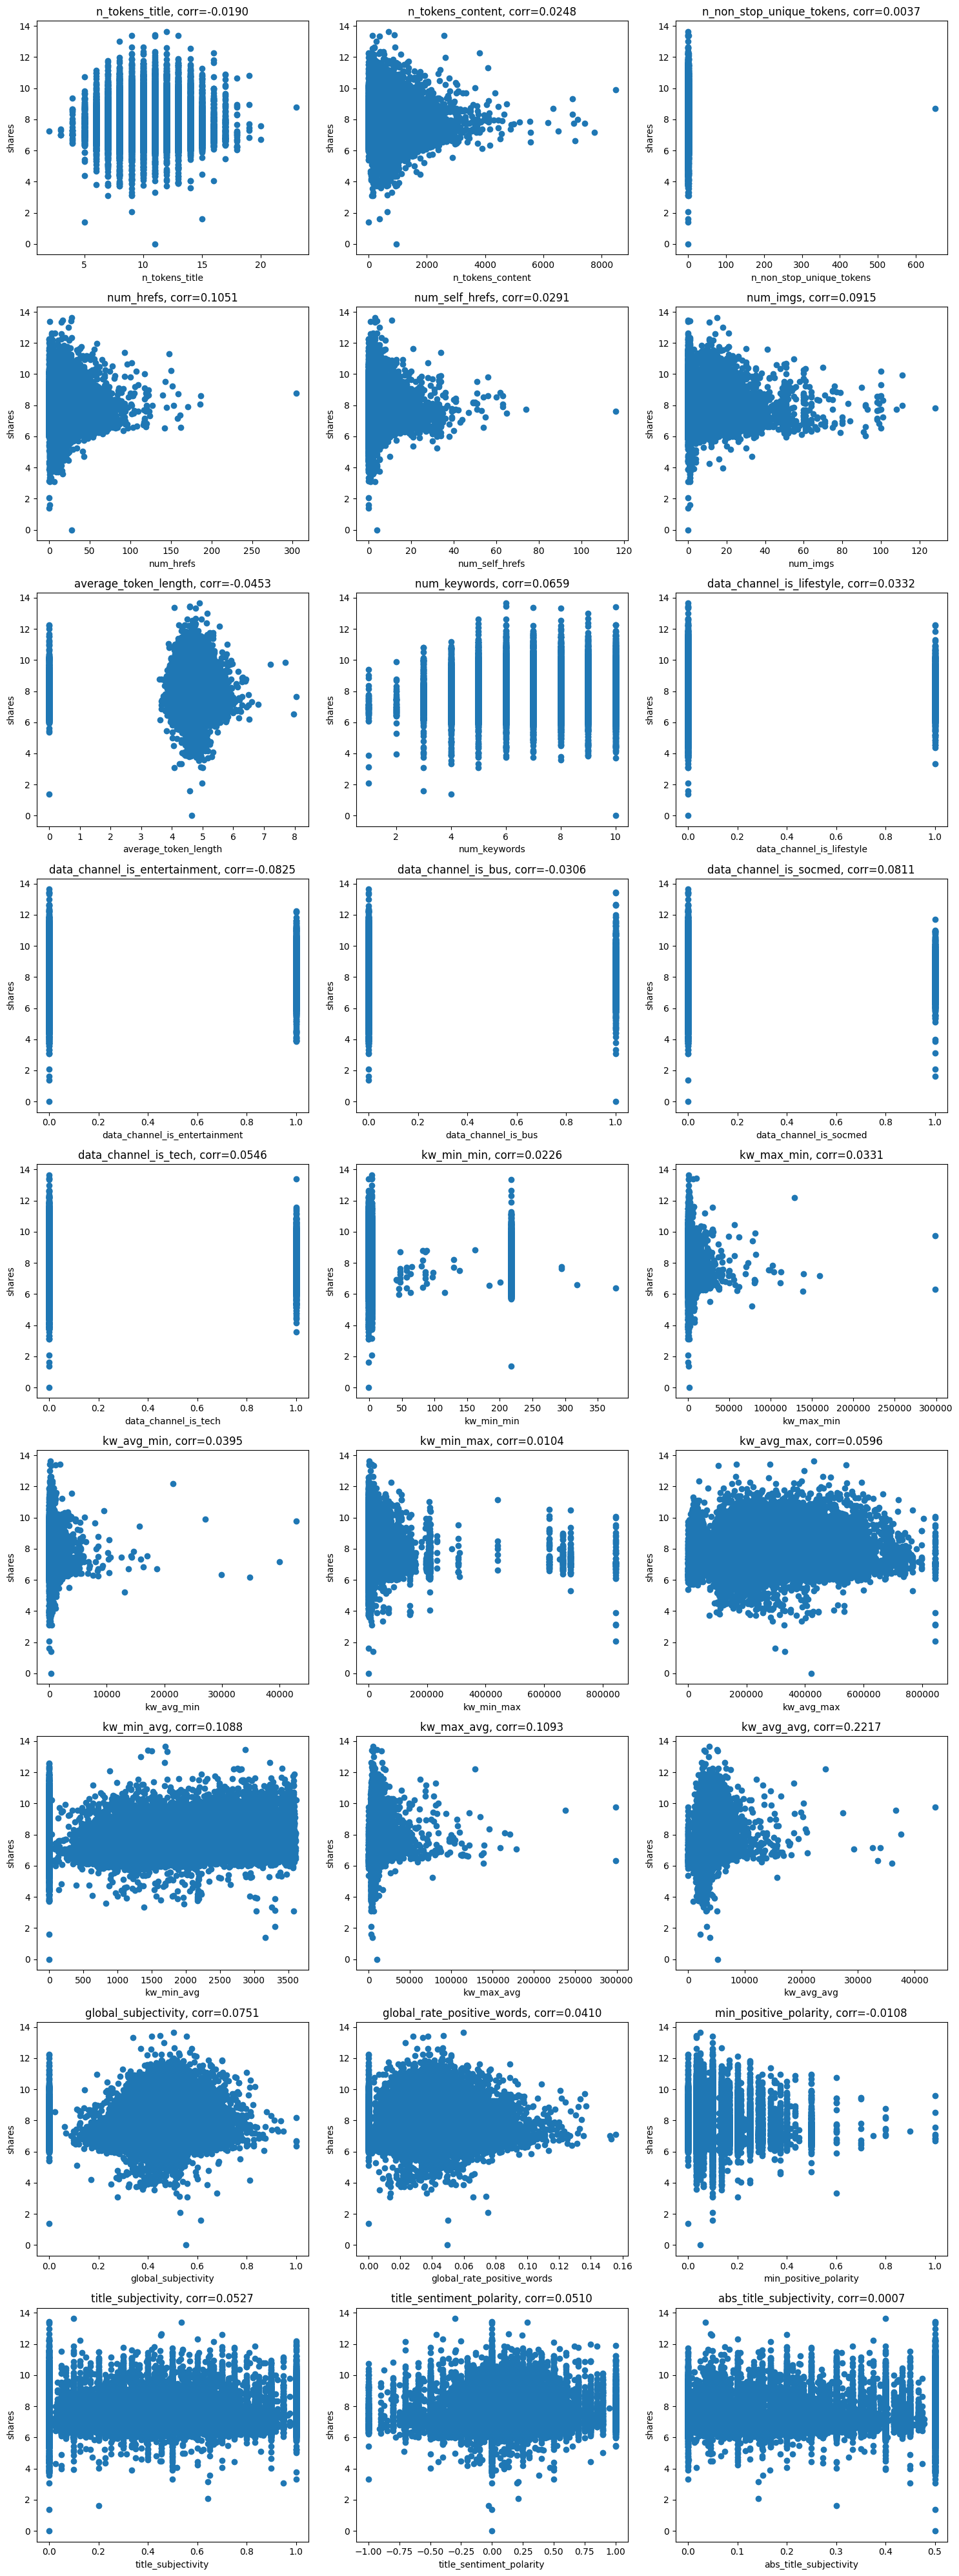

In [16]:
# Plot Significant Linear Regression Features
fig, axes = plt.subplots(9, 3, figsize=(15, 40))
axes = axes.ravel()  # Flatten the axes array for easy iteration

for i, feature in enumerate(lin_reg_features):
    if i < len(lin_reg_features):
      axes[i].scatter(df[feature], df['shares'])
      axes[i].set_xlabel(feature)
      axes[i].set_ylabel('shares')
      axes[i].set_title(f'{feature}, corr={correlation_df["Correlation"][feature]:.4f}')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

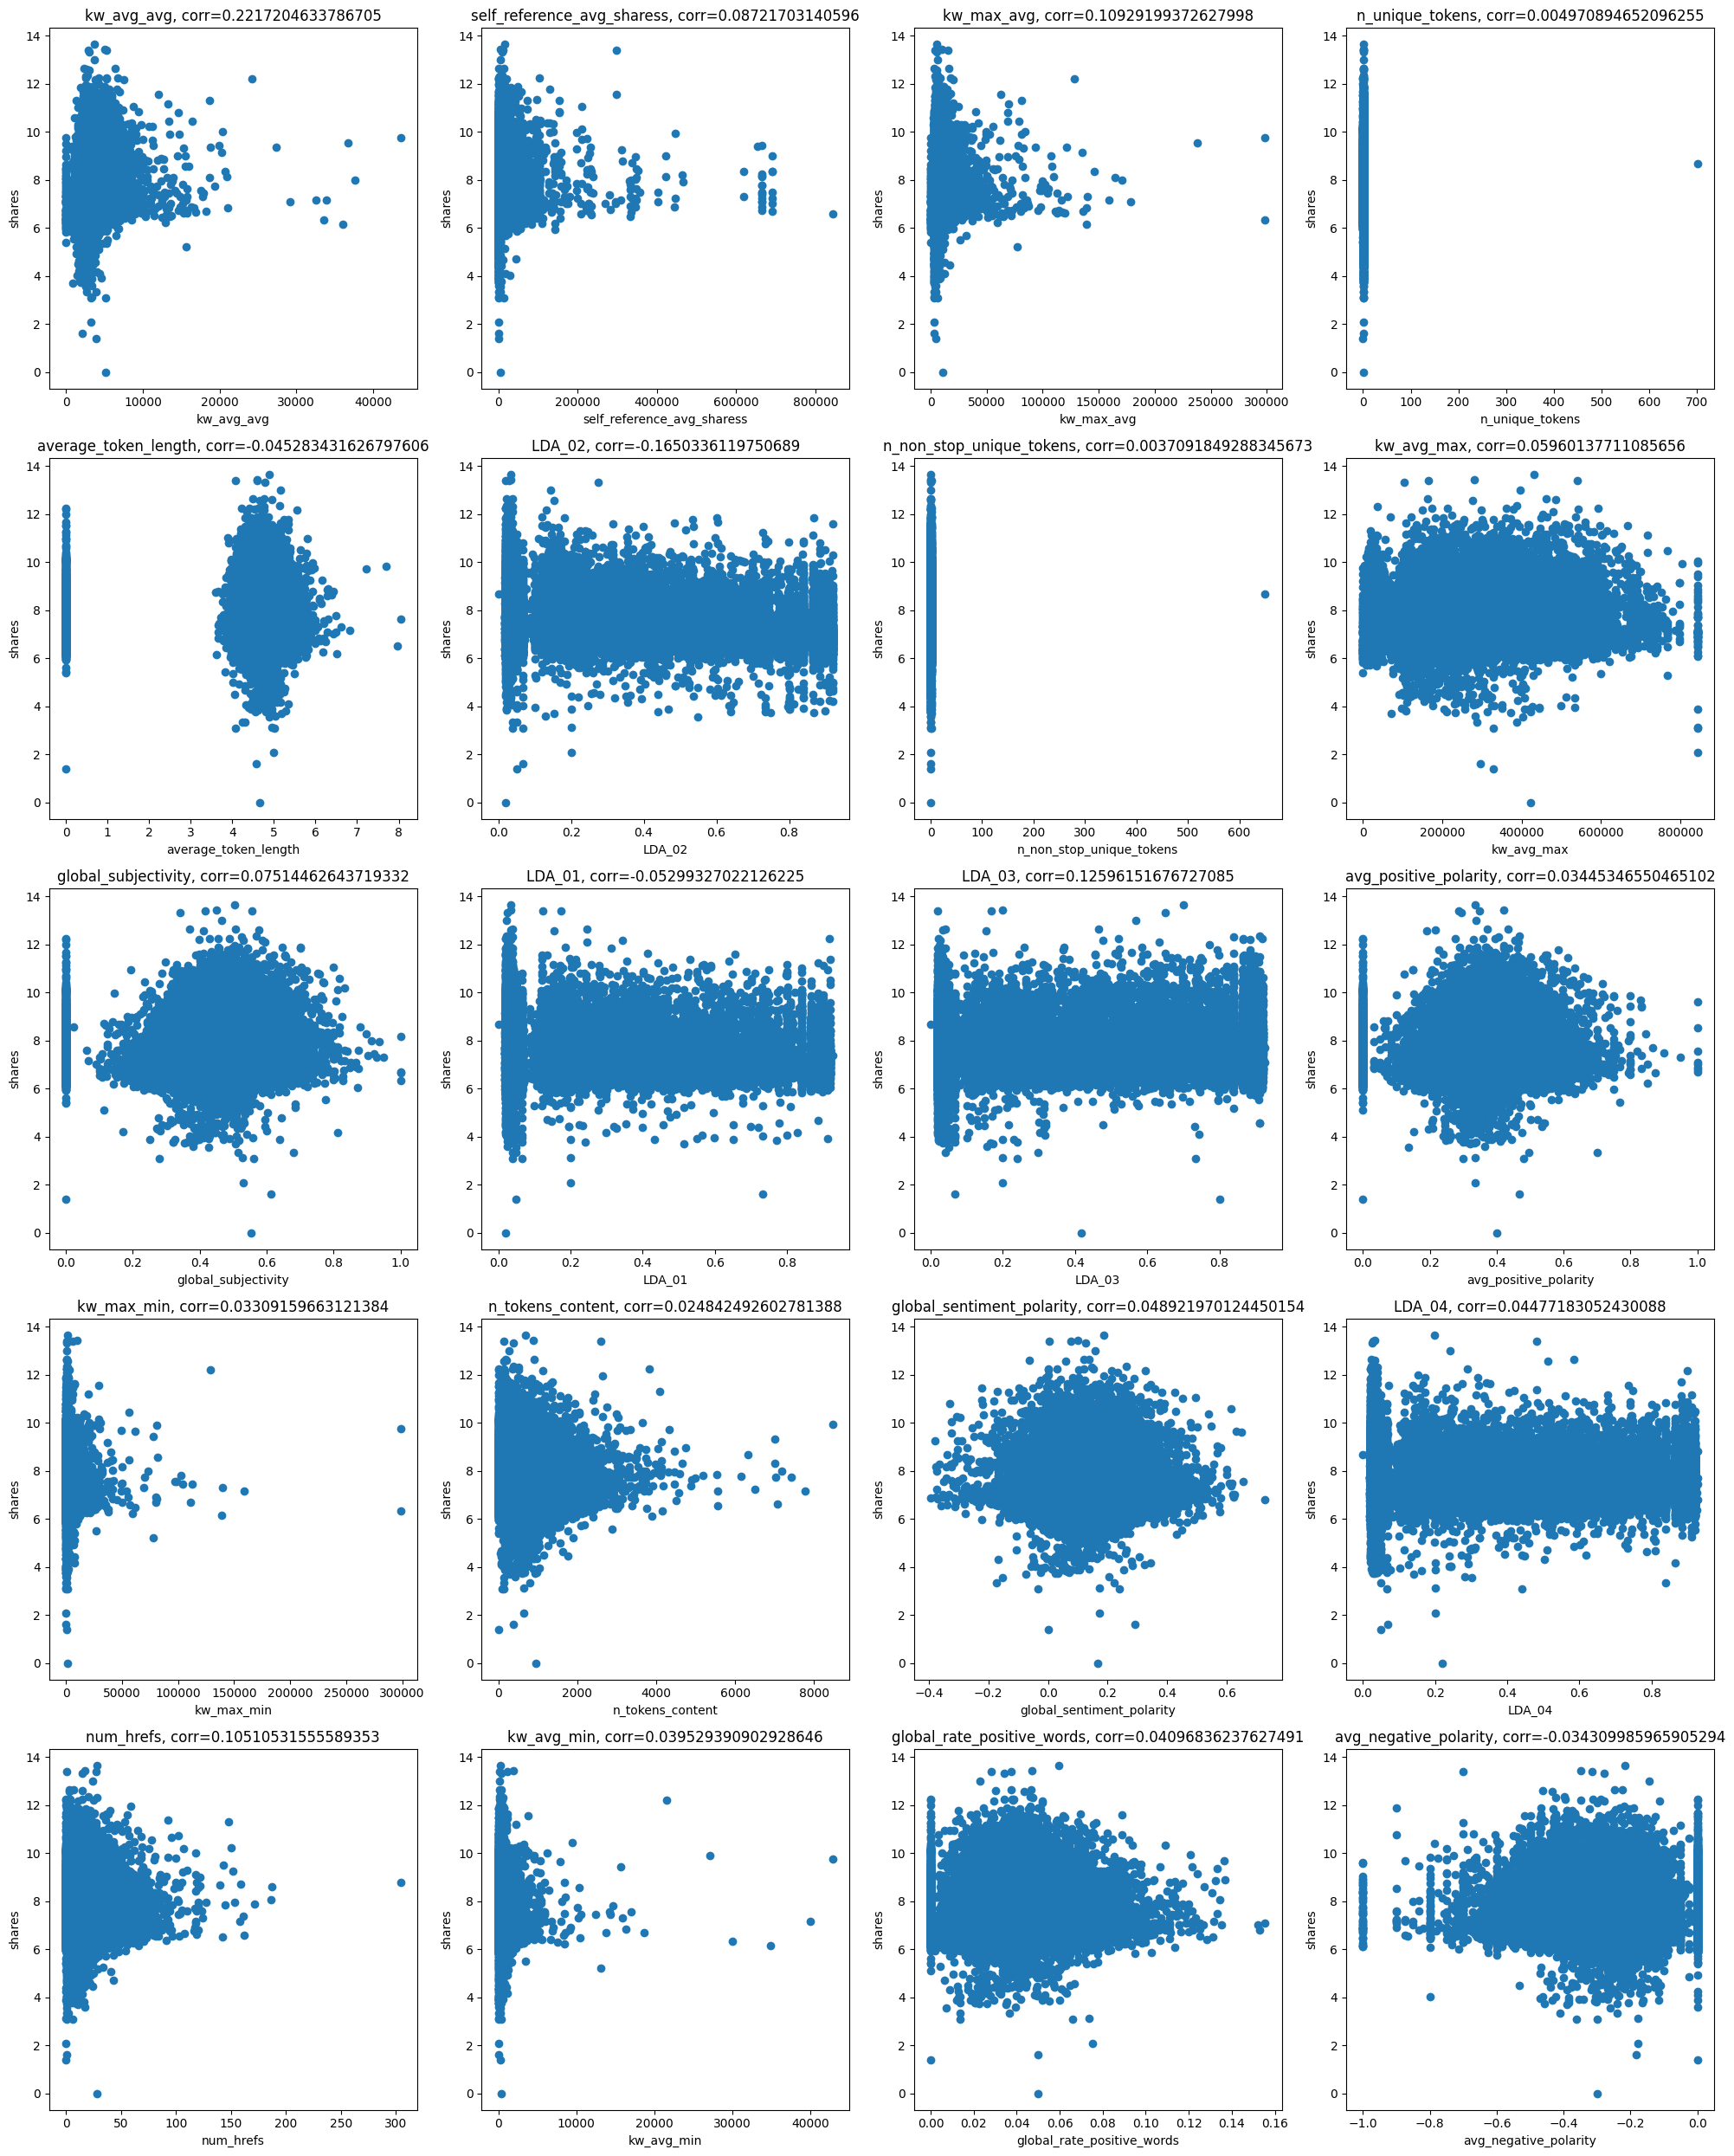

In [17]:
# Plot Important Regression Tree Features
fig, axes = plt.subplots(5, 4, figsize=(20, 25))
axes = axes.ravel()  # Flatten the axes array for easy iteration

for i, feature in enumerate(tree_features):
    if i < len(tree_features):
      axes[i].scatter(df[feature], df['shares'])
      axes[i].set_xlabel(feature)
      axes[i].set_ylabel('shares')
      axes[i].set_title(f'{feature}, corr={correlation_df["Correlation"][feature]}')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

**Response:**

There are some interesting non-linear relationships in the data that may be useful once we explore higher-order factors and interactions. We'll want to leave these in the dataset for further experimentation.

### 5. Remove Insignificant Variables

In [18]:
sig_df = df[sig_features + ['shares']]
sig_df.head()

,kw_avg_min,data_channel_is_socmed,kw_max_avg,global_rate_positive_words,data_channel_is_entertainment,global_sentiment_polarity,num_keywords,kw_min_min,avg_positive_polarity,title_subjectivity,...,avg_negative_polarity,data_channel_is_lifestyle,kw_min_avg,n_tokens_content,kw_max_min,LDA_03,kw_avg_max,num_imgs,n_non_stop_unique_tokens,shares
0,0.0,0.0,0.0,0.045662,1.0,0.092562,5.0,0.0,0.378636,0.500000,...,-0.350000,0.0,0.0,219.0,0.0,0.041263,0.0,1.0,0.815385,6.385194
1,0.0,0.0,0.0,0.043137,0.0,0.148948,4.0,0.0,0.286915,0.000000,...,-0.118750,0.0,0.0,255.0,0.0,0.050101,0.0,1.0,0.791946,6.566672
2,0.0,0.0,0.0,0.056872,0.0,0.323333,6.0,0.0,0.495833,0.000000,...,-0.466667,0.0,0.0,211.0,0.0,0.033334,0.0,1.0,0.663866,7.313220
3,0.0,0.0,0.0,0.041431,1.0,0.100705,7.0,0.0,0.385965,0.000000,...,-0.369697,0.0,0.0,531.0,0.0,0.028905,0.0,1.0,0.665635,7.090077
4,0.0,0.0,0.0,0.074627,0.0,0.281003,7.0,0.0,0.411127,0.454545,...,-0.220192,0.0,0.0,1072.0,0.0,0.028572,0.0,20.0,0.540890,6.224558


### 6. EDA Summary

**Response:**

As a result of our Exploratory Data Analysis, we resolved the following: In section 1, we found that the target variable `shares` is heavily right-skewed and ought to be log transformed. In section 2, our basic linear regression model revealed that there are many statistically significant factors in our dataset. However, some factors that proved insignificant are days of the week, LDA similarity, and rate of non-stop-words. In section 3, our basic regression tree considered keywords and some token features as most important. Unlike linear regression, the tree used many of the LDA features. In section 4, we calculated their Pearson correlation of significant factors with `shares` and plotted the factors' relationship with `shares` graphically. Even though some seem poorly correlated, there are some interesting non-linear relationships in the data that may be useful once we explore higher-order factors and interactions. We'll want to leave these in the dataset for further experimentation.

## Linear Regression Modeling

*Build and tune a linear regression model with high predictive power, explaining to Mashable which features most influence the number of
shares.*
1. *Split the data into training and testing sets. Use the training set for model fitting and the testing set to check for overfitting and predictive performance.*
2. *Explore transformations of the target and other variables.*
3. *Explore higher-order terms.*
4. *Reduce the model using the following methods: Stepwise model evaluation methods to remove insignificant variables. LASSO regression to fit the full model and remove insignificant variables. Tune the model to find the best α.*
5. *Write a section in your technical report that reports the out-of-sample performance of the models. Discuss the most significant predictors and evaluate the model's usefulness for predicting future shares.*

### 1. Train/Test Split

In [180]:
from sklearn.preprocessing import StandardScaler

In [181]:
# Train/Test Split
X = sig_df.drop(columns=['shares'])
y = sig_df['shares']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2. Variable Transformations

It's interesting that while there are a lot of right skewed predictors, we aren't able to log transform them because they contain negative values. We've managed to minimize this as much as possible in previous sections  but there is still some skewed graphs as seen below.

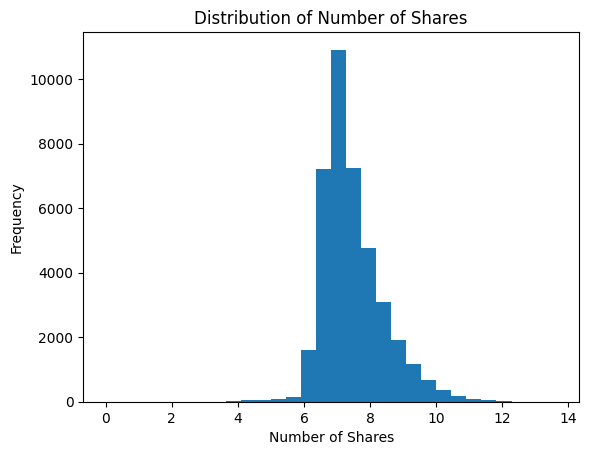

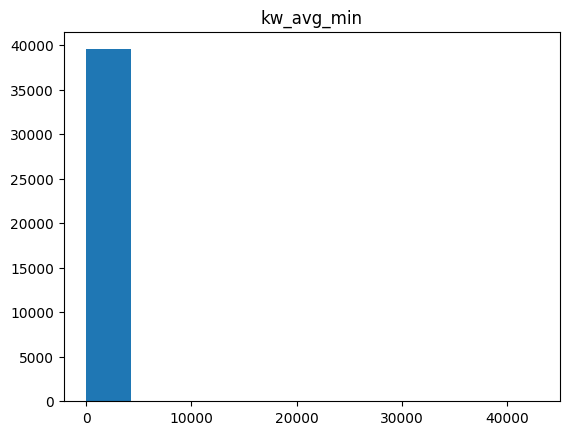

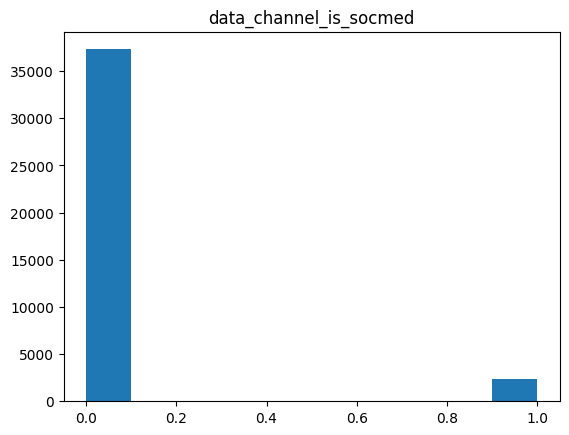

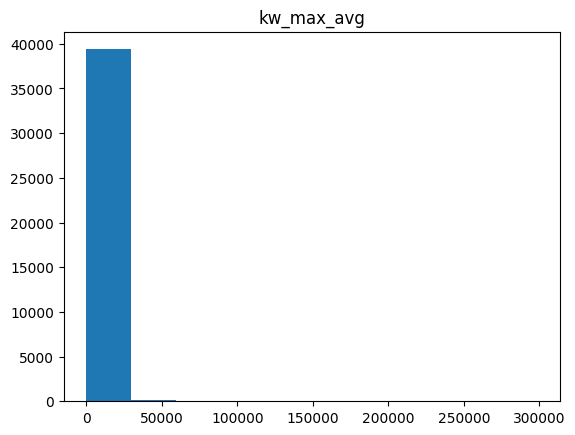

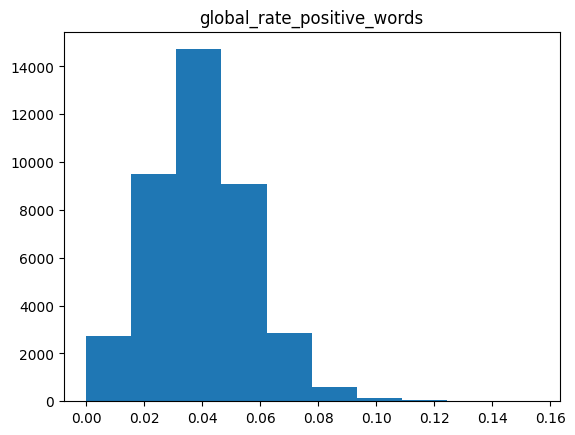

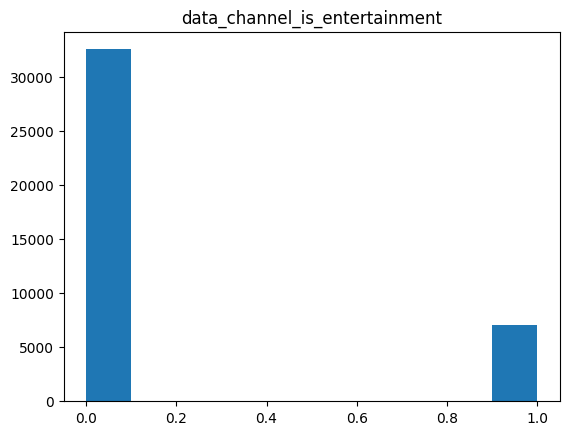

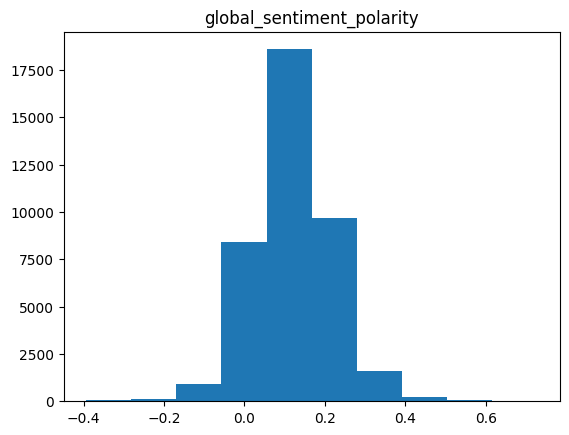

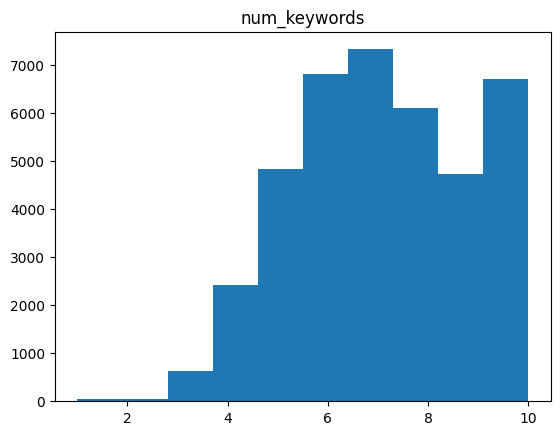

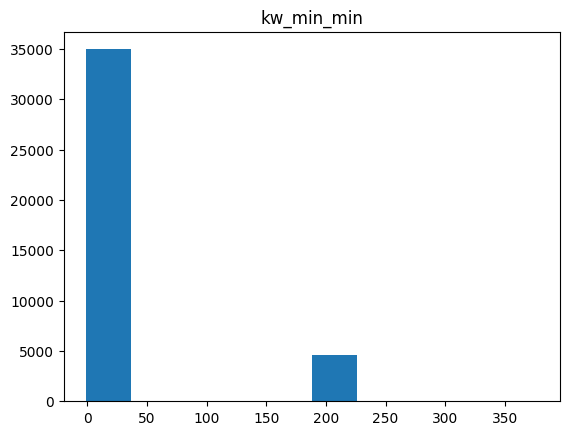

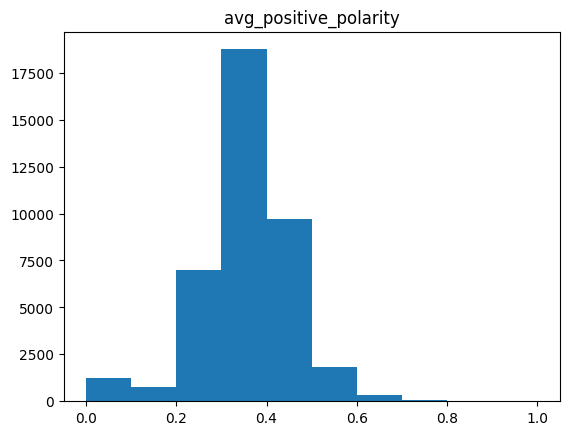

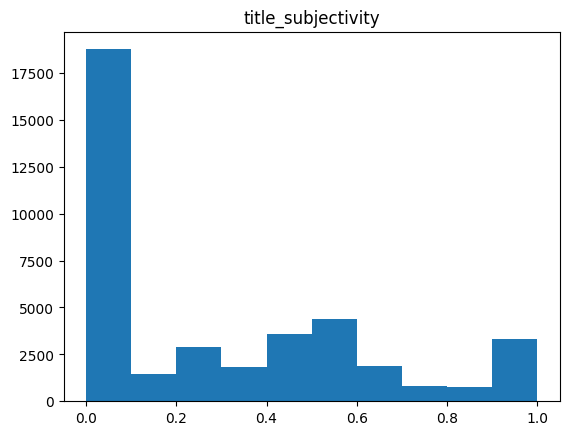

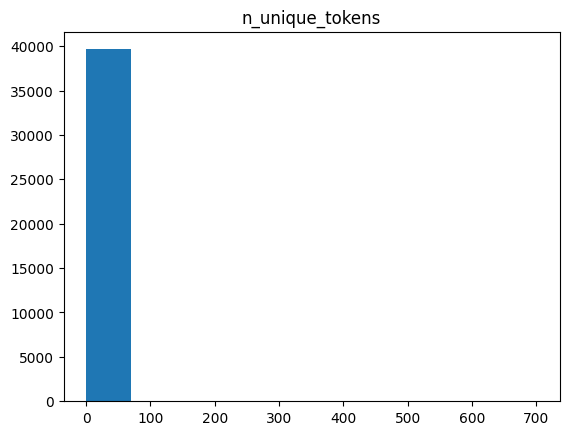

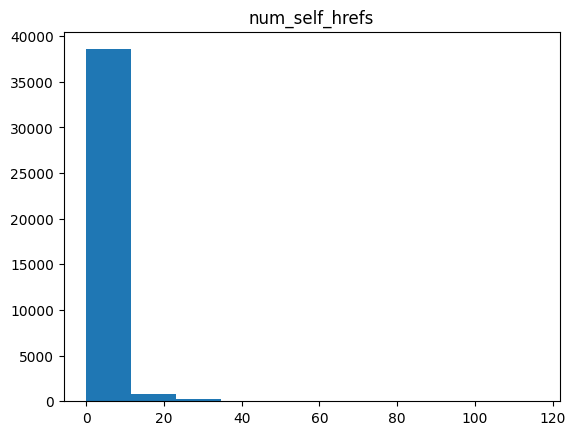

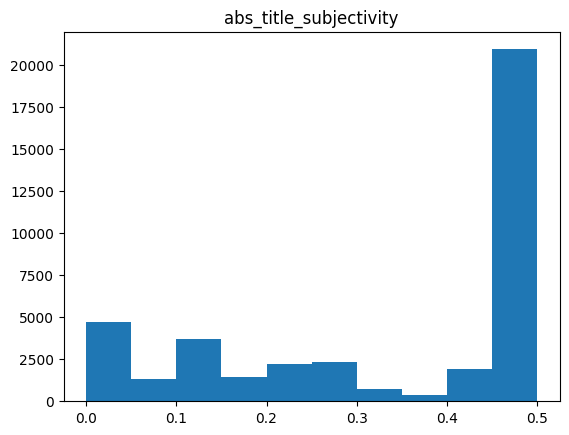

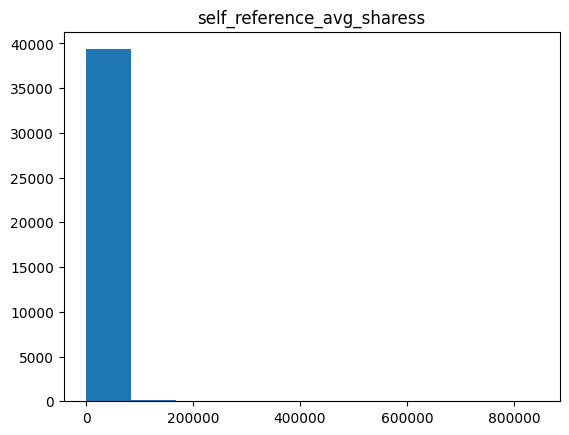

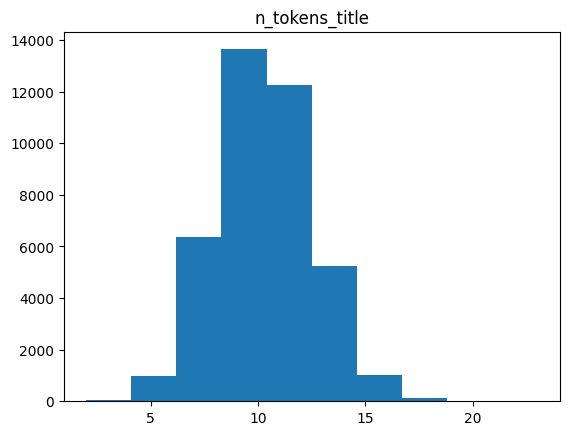

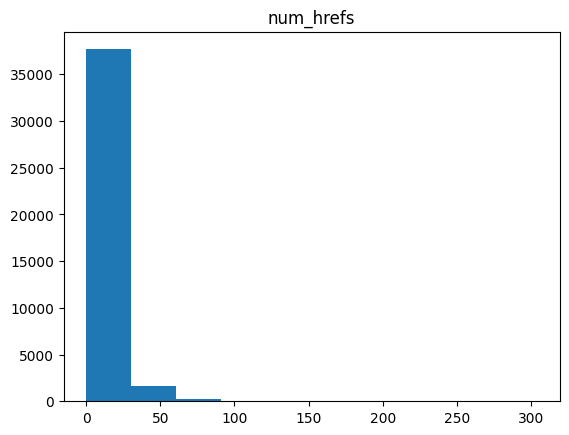

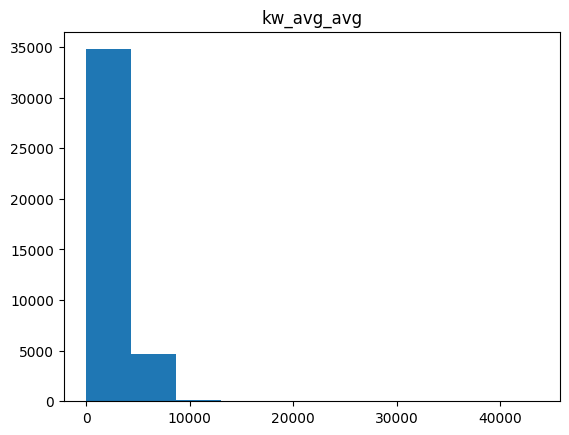

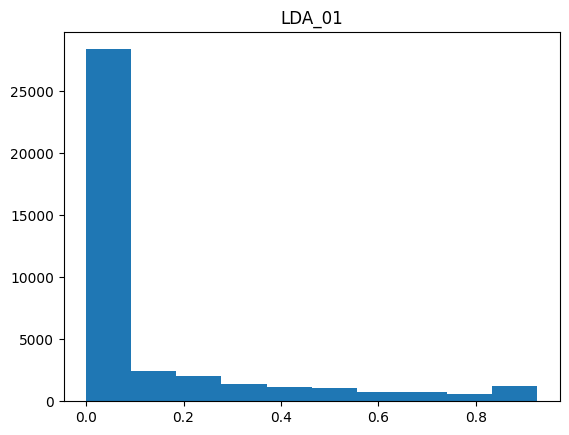

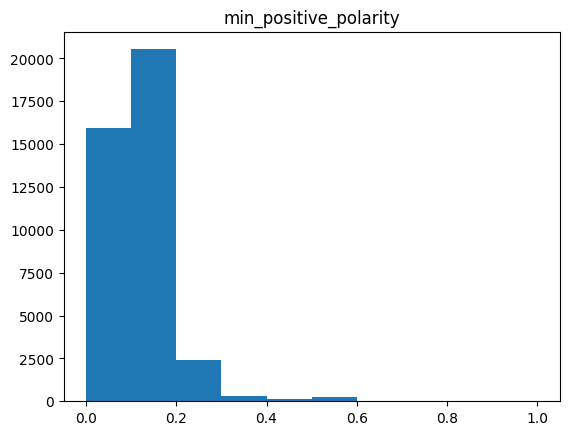

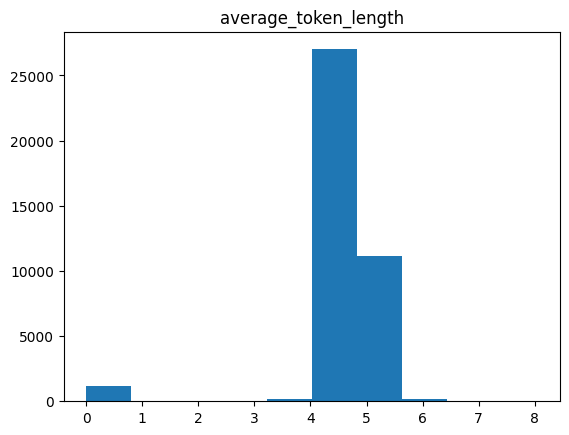

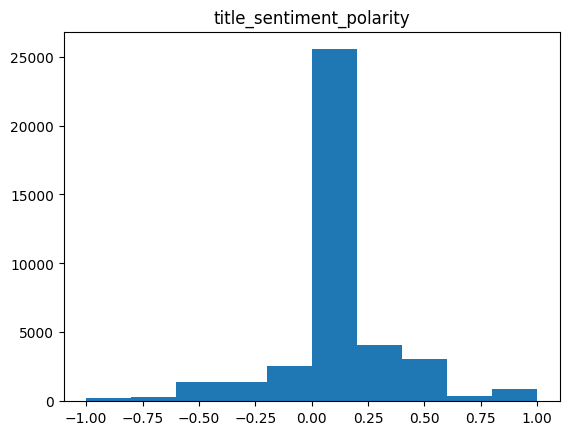

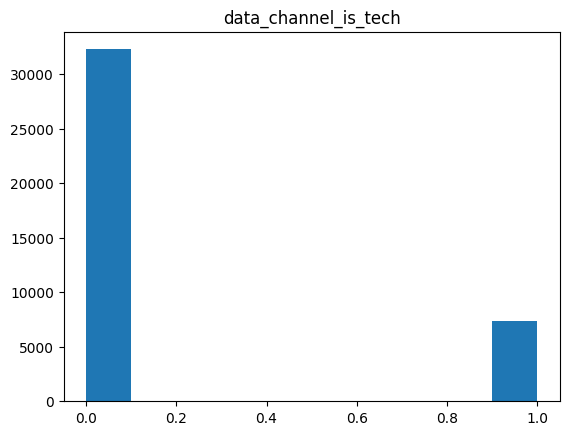

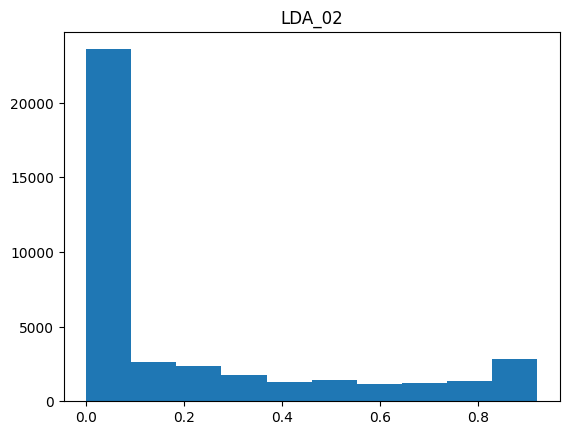

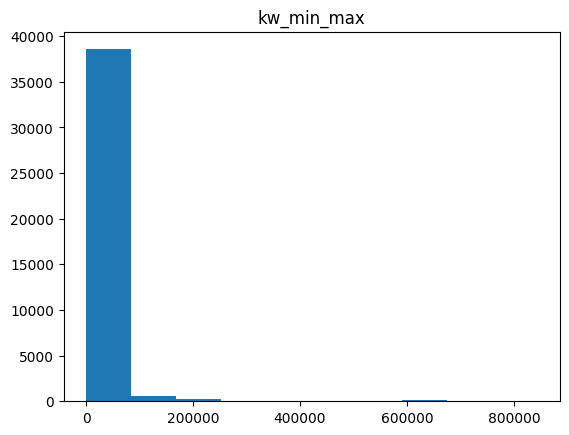

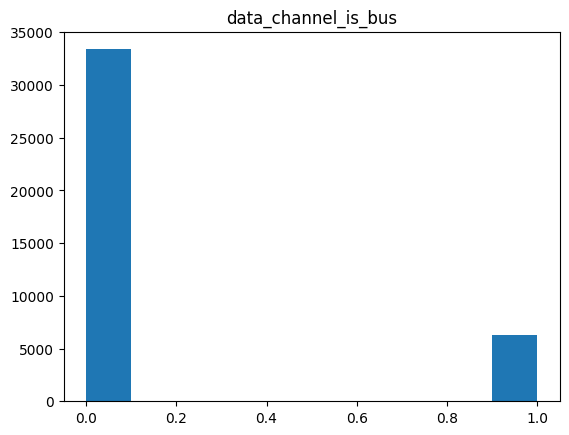

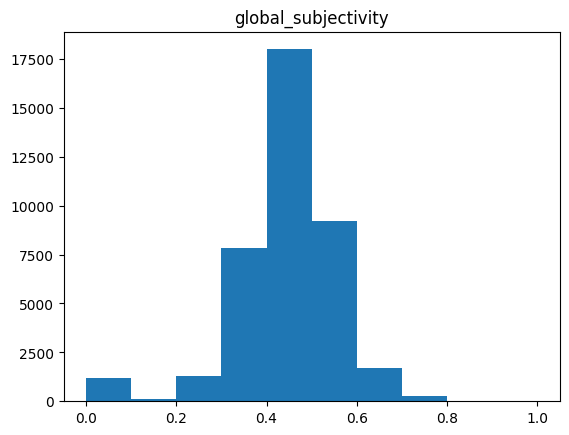

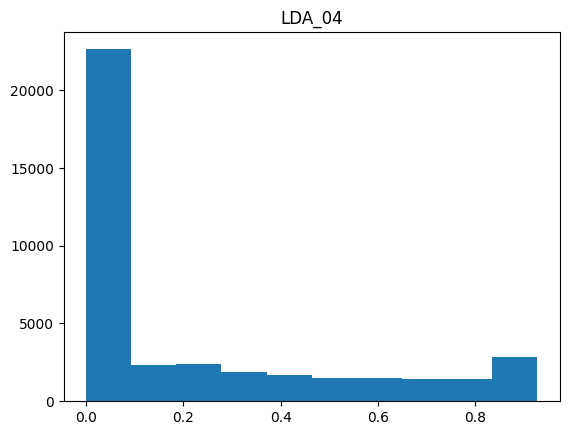

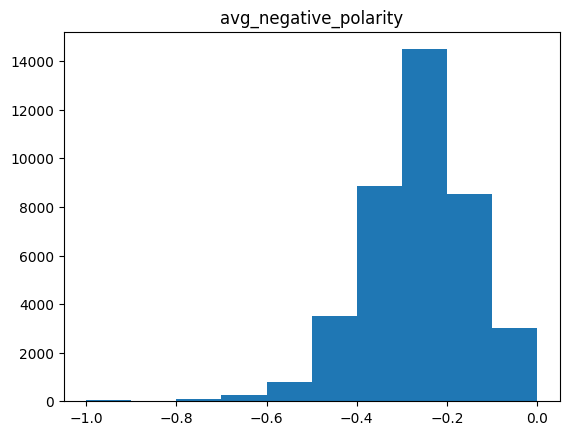

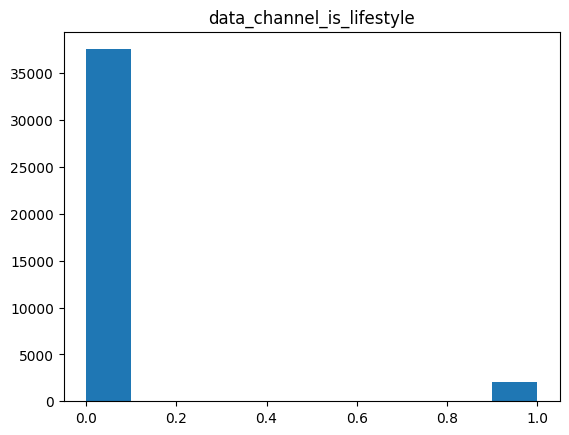

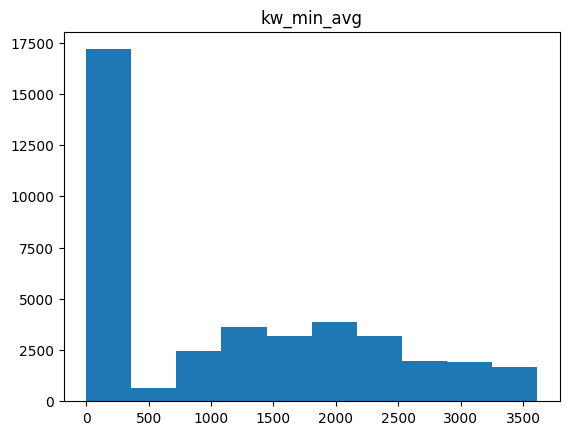

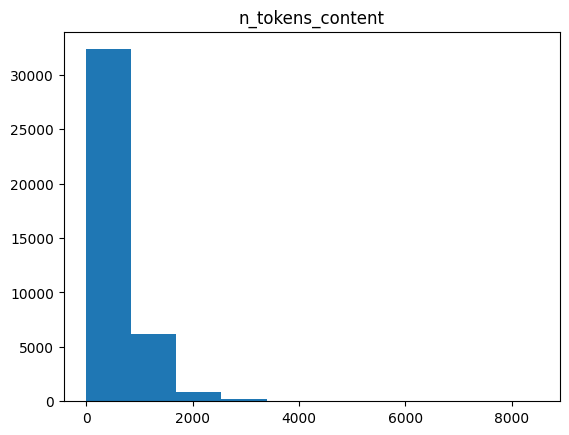

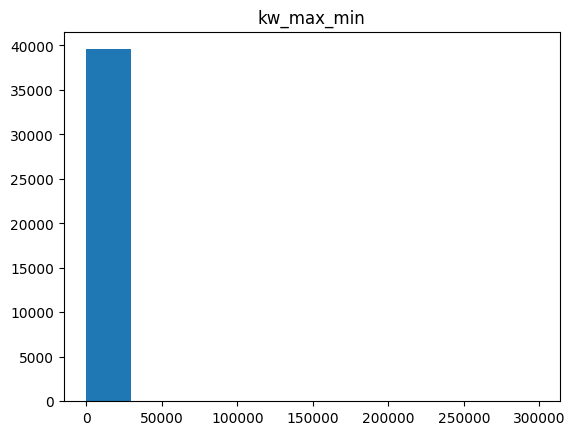

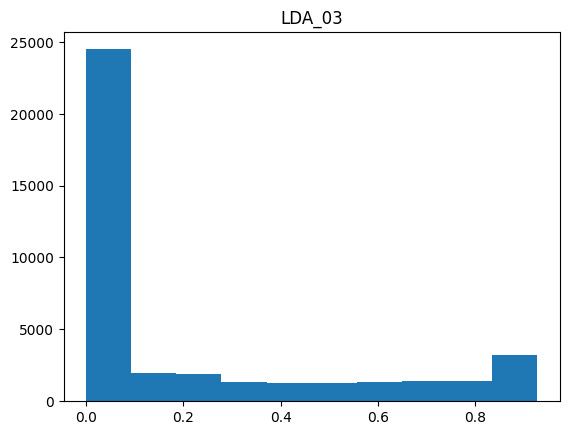

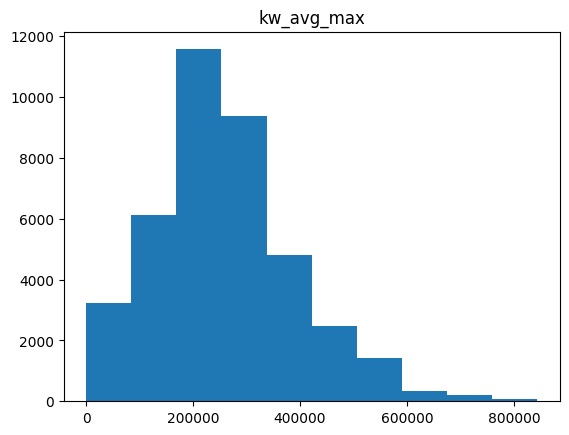

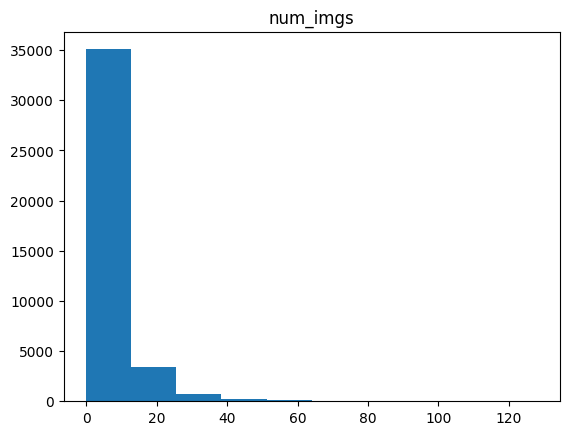

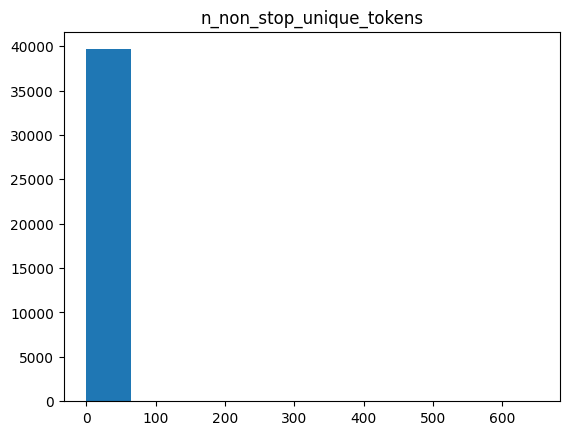

In [182]:
plt.hist(df['shares'], bins=30)
plt.xlabel('Number of Shares')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Shares')
plt.show()



for col in X:
    plt.hist(X[col], bins=10)
    plt.title(col)
    plt.show()




### 3. Higher-order Terms

In [183]:
from sklearn.preprocessing import PolynomialFeatures

In [184]:
mod_temp = sm.OLS(y, sm.add_constant(X)).fit()
while max(mod_temp.pvalues[1:]) > 0.05 and (len(X.columns) > 1):
  max_pvalue = np.argmax(mod_temp.pvalues[1:])+1
  X = X.drop(columns = X.columns[max_pvalue])
  mod_temp = sm.OLS(y,X).fit()


poly = PolynomialFeatures(2, include_bias=False)

X_categorical = [col for col in X.columns if set(X[col].unique()).issubset({0, 1})]
X_continuous = [col for col in X.columns if col not in X_categorical]


X_continuous_data = X[X_continuous]
X_continuous_transformed = poly.fit_transform(X_continuous_data)
hot_names = poly.get_feature_names_out(X_continuous_data.columns)
X_cont_poly = pd.DataFrame(X_continuous_transformed, columns=hot_names)
X_categorical_dummies = pd.get_dummies(X[X_categorical], drop_first=True)

X_full = pd.concat([X_cont_poly, X_categorical_dummies], axis=1)






### 4. Model Reduction

- Insignificant Variables
- Lasso Regularization
- Alpha Tuning

In [185]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size=0.2, random_state=42)

model_best = LassoCV(cv=5)
model_best.fit(X_train, y_train)

alpha_best = model_best.alpha_

reg_lasso = Lasso(alpha=alpha_best)

selector = SelectFromModel(reg_lasso, threshold="mean", max_features=None)
selector.fit(X_train, y_train)

X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

reg_lasso.fit(X_train_selected, y_train)

preds_lasso = reg_lasso.predict(X_test_selected)
print("Out of Sample R^2: ", r2_score(y_test, preds_lasso))

in_preds = reg_lasso.predict(selector.transform(X_train))
print("In Sample R^2: ", r2_score(y_train, in_preds))


Out of Sample R^2:  0.07143334313258232
In Sample R^2:  0.05510293014083434


### 5. Out-of-sample Performance

In [187]:
preds_lasso = reg_lasso.predict(X_test_selected)
print("Out of Sample R^2: ", r2_score(y_test, preds_lasso))

in_preds = reg_lasso.predict(selector.transform(X_train))
print("In Sample R^2: ", r2_score(y_train, in_preds))


Out of Sample R^2:  0.07143334313258232
In Sample R^2:  0.05510293014083434


### 6. Linear Regression Summary

- Significant predictors
- Model usefulness for prediction

**Response:**

In this section, we essentially did the same as we did in the last section in fitting a linear regression model to the data and tuned it to significant predictors. We used a step-wise method to reduce our model to significant predictors and cut out about half of the values. After, we added some higher order terms and then used lasso to reduce it (the lab asked us to do both LASSO and stepwise elimination, but LASSO does the same thing). We actually get a worse out of sample R^2 score than the simple regression model. There are enough higher order terms that it makes the model harder to fit and lowers the score as a result. As such, I wouldn't recommend using too many higher order terms to make a good model for this particular data set.

## Regression Tree Modeling

*Build and tune a regression tree model.*
1. *Use the same training and testing sets as above.*
2. *Use cost-complexity pruning and cross-validation to find a model that fits well on out-of-sample data.*
3. *Fit a random forest regression model, using cost-complexity pruning for the individual trees.*
4. *Write a section in your technical report that reports the out-of-sample performance of the models. Discuss the model’s usefulness for predicting future shares*

### 1. Train Regression Tree

### 2. Pruning and Cross-Validation

### 3. Random Forest with Pruning

### 4. Out-of-sample Performance

### 5. Regression Tree Summary

- Model usefulness

**Response:**

TODO

## Conclusion

*Compare each model’s predictive accuracy on the test set. Choose the best-performing model as the final predictive model. Write a concluding section in your technical report that addresses Mashable's business concerns and presents your final model along with your confidence in its predictions.*

**Response:**

TODO